In [ ]:
import re
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

# # In this section, we want to extract 30 pages of data from the site ....

In [ ]:
url1='https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&ref_=adv_prv'
url2='https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&start=101&ref_=adv_nxt'
url3='https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&start=201&ref_=adv_nxt'
url4='https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&start=301&ref_=adv_nxt'
url5='https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&start=401&ref_=adv_nxt'
url6='https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&start=501&ref_=adv_nxt'
url7='https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&start=601&ref_=adv_nxt'
url8='https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&start=701&ref_=adv_nxt'
url9='https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&start=801&ref_=adv_nxt'
url10='https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&start=901&ref_=adv_nxt'
url11='https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&start=1001&ref_=adv_nxt'
url12='https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&start=1101&ref_=adv_nxt'
url13='https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&start=1201&ref_=adv_nxt'
url14='https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&start=1301&ref_=adv_nxt'
url15='https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&start=1401&ref_=adv_nxt'
url16='https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&start=1501&ref_=adv_nxt'
url17='https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&start=1601&ref_=adv_nxt'
url18='https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&start=1701&ref_=adv_nxt'
url19='https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&start=1801&ref_=adv_nxt'
url20='https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&start=1901&ref_=adv_nxt'
url21='https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&start=2001&ref_=adv_nxt'
url22='https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&start=2101&ref_=adv_nxt'
url23='https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&start=2201&ref_=adv_nxt'
url24='https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&start=2301&ref_=adv_nxt'
url25='https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&start=2401&ref_=adv_nxt'
url26='https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&start=2501&ref_=adv_nxt'
url27='https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&start=2601&ref_=adv_nxt'
url28='https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&start=2701&ref_=adv_nxt'
url29='https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&start=2801&ref_=adv_nxt'
url30='https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&start=2901&ref_=adv_nxt'


In [ ]:
listurl=[url1,url2,url3,url4,url5,url6,url7,url8,url9,url10,url11,url12,url13,url14,url15,url16,url17,url18,url19,url20,url21,url22,url23,url24,url25,url26,url27,url28,url29,url30]

In [ ]:
listurl[0]

'https://www.imdb.com/search/title/?title_type=feature,tv_series&count=100&ref_=adv_prv'

In [ ]:
#def print_msg(the_msg):
#  """this doctring is indented"""
#  print("indented!")

# A number of additional data have been extracted ... Data related to the name of the film and the names of the actors and the director of the film are used in the project.

In [ ]:
movie_name = []
year = []
time = []
rating = []
metascore = []
votes = []
gross = []
stars=[]
liststars=[]
for i in range(0,29):
   page=requests.get(listurl[i])
   soup=BeautifulSoup(page.text,'html.parser')
   movie_data=soup.findAll('div',attrs={'class':'lister-item mode-advanced'})
   
  
   for store in movie_data:
    
    name = store.h3.a.text
    movie_name.append(name)

    year_of_release = store.h3.find('span', class_ = "lister-item-year text-muted unbold").text.replace('(','').replace(')','')
    year.append(year_of_release)

    runtime = store.p.find('span', class_ = 'runtime').text.replace(' min','') if store.p.find('span', class_ = 'runtime') else "^^^^"
    time.append(runtime)

    rate = store.find('div',class_ = 'inline-block ratings-imdb-rating').text.replace('\n','') if store.find('div',class_ = 'inline-block ratings-imdb-rating') else "^^^^"
    rating.append(rate)

    meta = store.find('span', class_ = 'metascore').text.replace(' ','') if store.find('span', class_ = 'metascore') else '^^^^^^^'
    metascore.append(meta)

    value = store.find_all('span', attrs = {'name' : 'nv'}) #if store.find_all('span', attrs = {'name' : 'nv'}) else '^^^^'
    vote = value[0].text if len(value) > 1 else "^^^^"
    votes.append(value)

    grosses = value[1].text if len(value) > 1 else "^^^^"
    gross.append(grosses)
  
    #star= store.p.a   #find('a', href_ ="/name/nm2110418/?ref_=adv_li_st_0" ).text if store.p.find('a', href="/name/nm2110418/?ref_=adv_li_st_0" ).text else "not"
    #stars.append(star)
    a=str(store)
    ee=re.findall(r'href="/name/.*>(.*)<',a)
    liststars.append(ee)    




In [ ]:
len(movie_name)

2900

In [ ]:
len(liststars)

2900

In [ ]:
datas={'movie name': movie_name, 'stars in the movie' : liststars}

In [ ]:
df=pd.DataFrame(datas)
df

,movie name,stars in the movie
0,Eternals,"[Chloé Zhao, Gemma Chan, Richard Madden, Angel..."
1,Euphoria,"[Hunter Schafer, Zendaya, Angus Cloud, Sydney ..."
2,Archive 81,"[Mamoudou Athie, Dina Shihabi, Evan Jonigkeit,..."
3,Peacemaker,"[John Cena, Danielle Brooks, Freddie Stroma, C..."
4,Scream,"[Matt Bettinelli-Olpin, Tyler Gillett, Neve Ca..."
...,...,...
2895,Starstruck,"[Rose Matafeo, Nikesh Patel, Emma Sidi, Joe Ba..."
2896,The Chronicles of Riddick,[) arrives on a planet called Helion Prime and...
2897,The Mule,"[Clint Eastwood, Clint Eastwood, Patrick L. Re..."
2898,Love Story,"[Arthur Hiller, Ali MacGraw, Ryan O'Neal, John..."


In [ ]:
df.head()

,movie name,stars in the movie
0,Eternals,"[Chloé Zhao, Gemma Chan, Richard Madden, Angel..."
1,Euphoria,"[Hunter Schafer, Zendaya, Angus Cloud, Sydney ..."
2,Archive 81,"[Mamoudou Athie, Dina Shihabi, Evan Jonigkeit,..."
3,Peacemaker,"[John Cena, Danielle Brooks, Freddie Stroma, C..."
4,Scream,"[Matt Bettinelli-Olpin, Tyler Gillett, Neve Ca..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movie name          2900 non-null   object
 1   stars in the movie  2900 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [ ]:
df.describe()

,movie name,stars in the movie
count,2900,2900
unique,2811,2888
top,Charlie's Angels,[]
freq,3,3


In [ ]:
df.shape

(2900, 2)

In [ ]:
df['stars in the movie'][1]

['Hunter Schafer', 'Zendaya', 'Angus Cloud', 'Sydney Sweeney']

In [ ]:
actorlist=[]
for i in range(0,len(movie_name)):
  for actor in df['stars in the movie'][i]:
    actorlist.append(actor)

In [ ]:
len(actorlist)

13732

In [ ]:
datas2={'allactors' : actorlist }

In [ ]:
df2=pd.DataFrame(datas2)
df2

,allactors
0,Chloé Zhao
1,Gemma Chan
2,Richard Madden
3,Angelina Jolie
4,Salma Hayek
...,...
13727,Duncan Jones
13728,Jake Gyllenhaal
13729,Michelle Monaghan
13730,Vera Farmiga


In [ ]:
df3=df2.allactors.unique()

In [ ]:
len(df3)

7444

In [ ]:
datasremoved={'allactorsfinall' : df3 }

In [ ]:
dfremoved=pd.DataFrame(datasremoved)
dfremoved

,allactorsfinall
0,Chloé Zhao
1,Gemma Chan
2,Richard Madden
3,Angelina Jolie
4,Salma Hayek
...,...
7439,Cesar De León
7440,Gustavo Muñoz
7441,Arthur Hiller
7442,Ali MacGraw


In [ ]:
dfremoved['allactorsfinall'][0]

'Chloé Zhao'

In [ ]:
# Import Library
import networkx as nx

In [ ]:
dfremoved['allactorsfinall'][0]

'Chloé Zhao'

In [ ]:
G = nx.Graph()



# Graph formation

In [ ]:
for i in range(0,1000):
  for j in range(0,1000):
    if dfremoved['allactorsfinall'][i] in df['stars in the movie'][j]:
      for edges in range(0,len(df['stars in the movie'][j])):
        if dfremoved['allactorsfinall'][i] != df['stars in the movie'][j][edges]:
          G.add_edge(dfremoved['allactorsfinall'][i],df['stars in the movie'][j][edges])
        


#Graph illustration

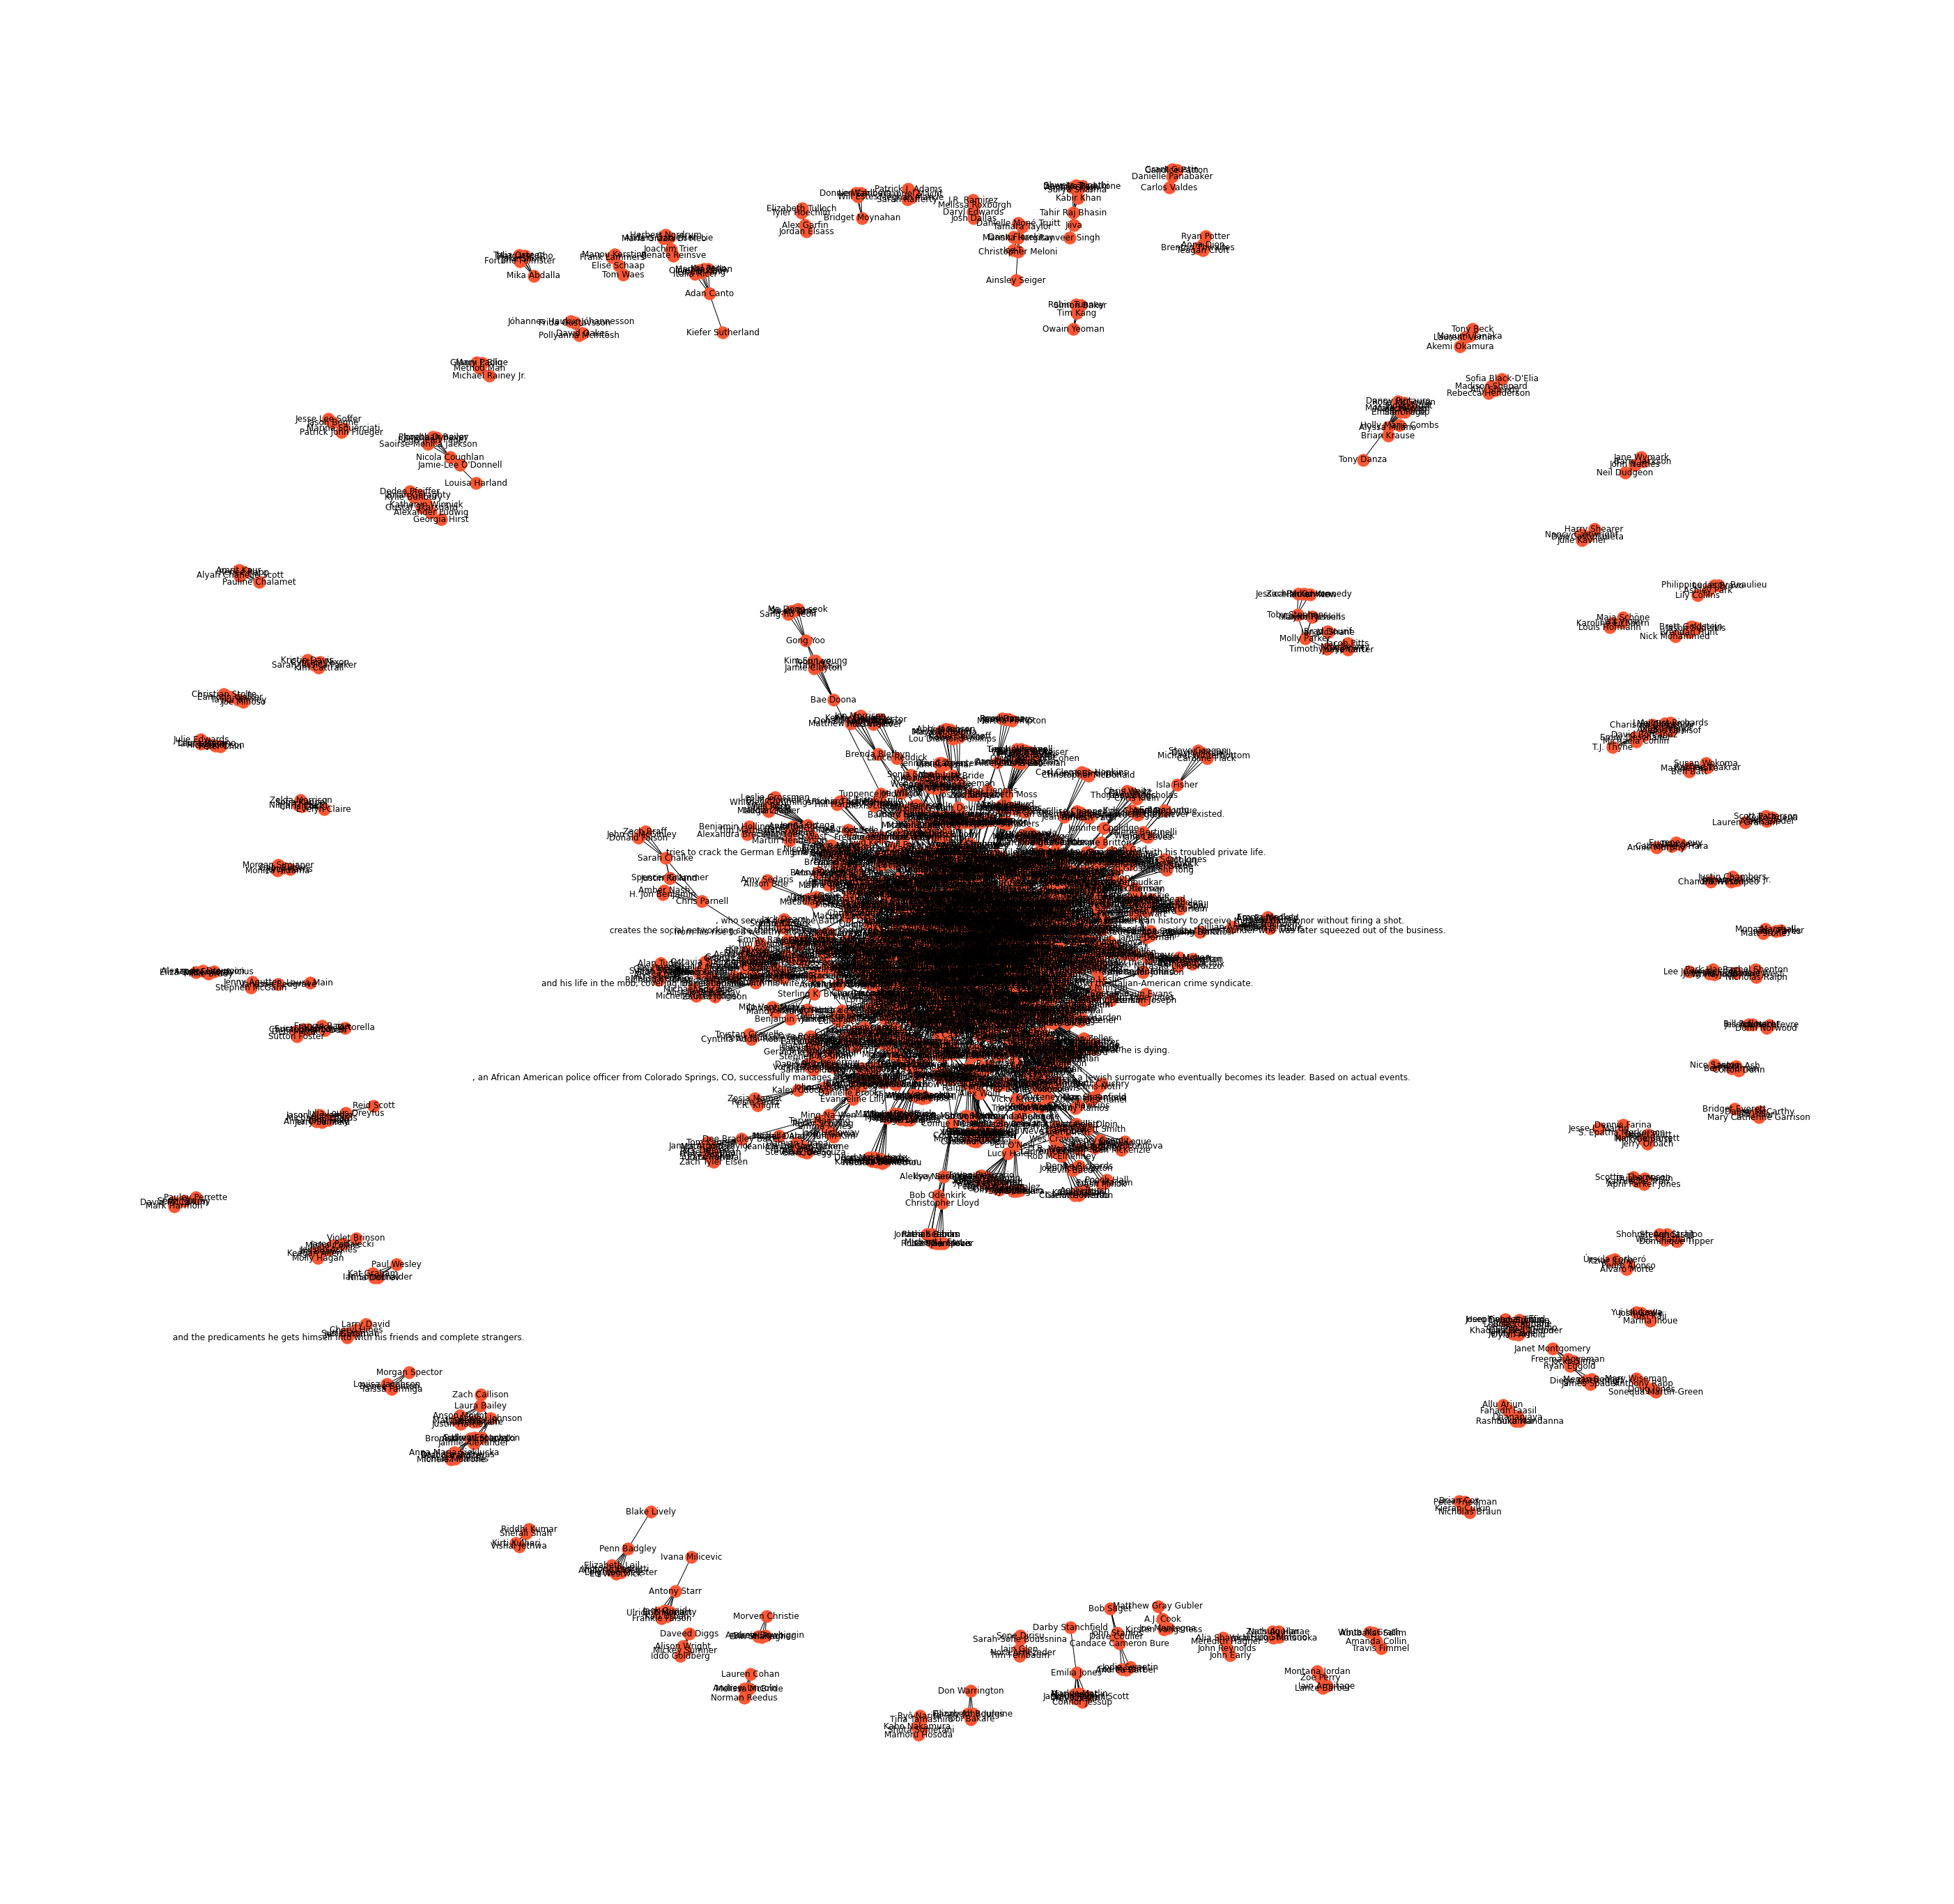

In [ ]:
# Drawing
import matplotlib.pyplot as plt
layout = nx.fruchterman_reingold_layout(G)
plt.figure(figsize=(50,50))
plt.axis("off") 
nx.draw_networkx(G, layout, with_labels=True, node_color = '#FF5733' )

In [ ]:
print(nx.info(G))

Graph with 2055 nodes and 4253 edges


# The grid can be visualized in such a way that the color of the nodes changes based on the degree and size of the nodes based on the centrality. The code needed to do this is as follows.

(-1.1947129034996031,
 1.2085473799705504,
 -1.1380945938825608,
 1.1570061939954759)

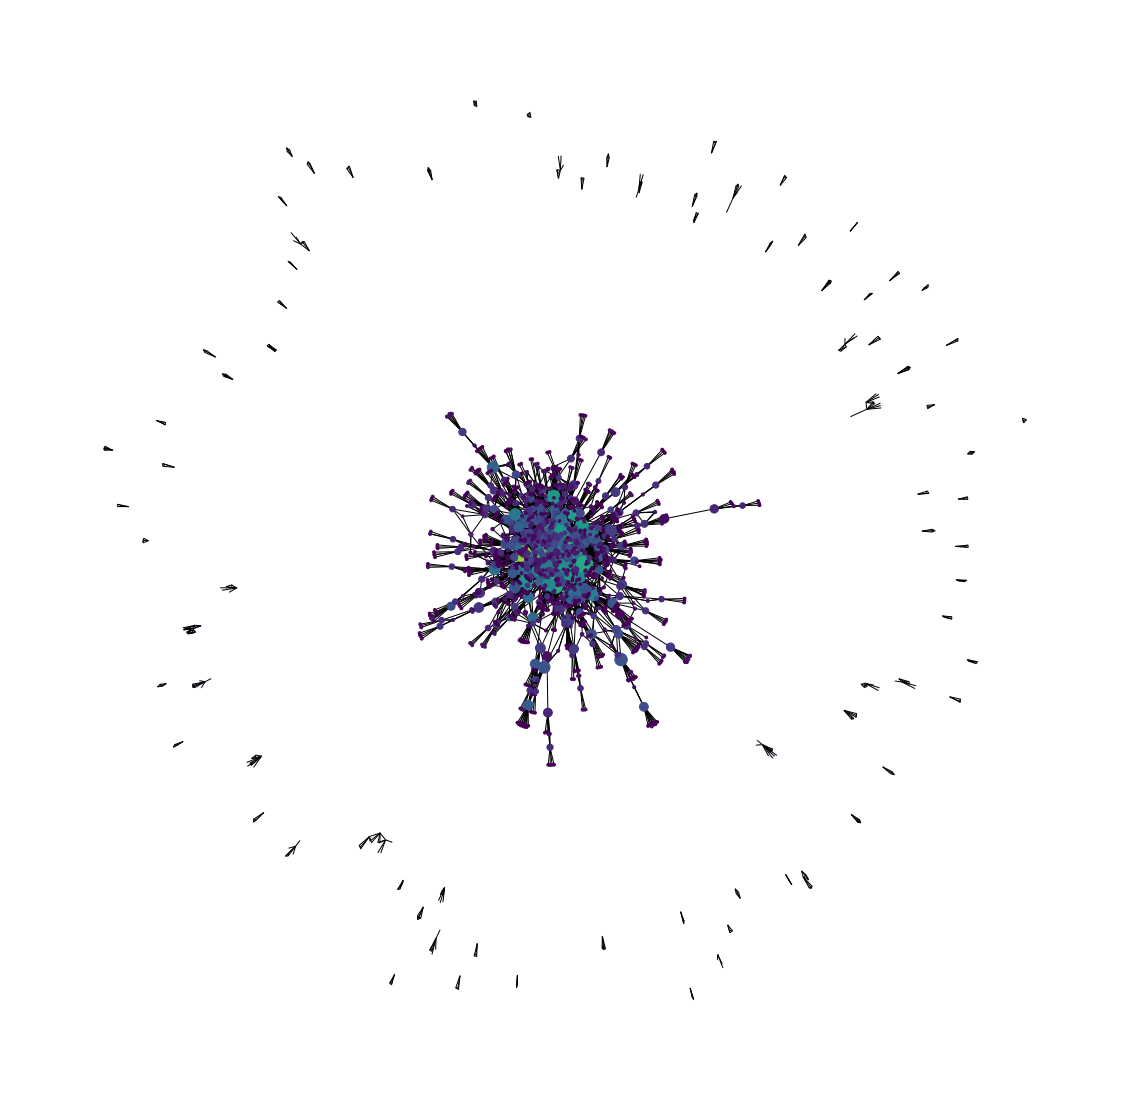

In [ ]:
pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [ ]:
sorted(betCent, key=betCent.get, reverse=True)[:5]

['Leonardo DiCaprio',
 'Matt Damon',
 'Ben Affleck',
 'Brad Pitt',
 'Samuel L. Jackson']

#Which actors have common playmates but are not yet common neighbors (common neighbors).

#The opposite number indicates the number of actors they share

In [ ]:
common=[(e[0], e[1], len(list(nx.common_neighbors(G, e[0],e[1])))) for e in nx.non_edges(G)]
sorted_common = sorted(common, key=lambda x: x[2],reverse=True)
sorted_common[:10] 

[('Robert Downey Jr.', 'Samuel L. Jackson', 9),
 ('Brad Pitt', 'Matthew McConaughey', 6),
 ('Scarlett Johansson', 'Chris Hemsworth', 6),
 ('Scarlett Johansson', 'Mark Ruffalo', 6),
 ('Joe Russo', 'Joss Whedon', 5),
 ('Josh Brolin', 'Ethan Coen', 5),
 ('Anthony Russo', 'Joss Whedon', 5),
 ('Christian Bale', 'Leonardo DiCaprio', 5),
 ('Lucy Hale', 'Jada Pinkett Smith', 4),
 ('Lucy Hale', 'Skeet Ulrich', 4)]

#Graph Density

In [ ]:
nx.density(G)

0.0020151766063250865

#Community Detection

In [ ]:
# Community Detection using Modularity
from networkx.algorithms.community import greedy_modularity_communities
greedy_modularity_communities(G)

[frozenset({', an African American police officer from Colorado Springs, CO, successfully manages to infiltrate the local Ku Klux Klan branch with the help of a Jewish surrogate who eventually becomes its leader. Based on actual events.',
            ', from his rise to a wealthy stock-broker living the high life to his fall involving crime, corruption and the federal government.',
            'Aaron Eckhart',
            'Aaron Nee',
            'Aaron Taylor-Johnson',
            'Abigail Breslin',
            'Adam Driver',
            'Adam McKay',
            'Adam Nee',
            'Adam Wingard',
            'Adil El Arbi',
            'Adria Arjona',
            'Adrianne Palicki',
            'Aitana Sánchez-Gijón',
            'Aja Naomi King',
            'Alec Baldwin',
            'Alejandro G. Iñárritu',
            'Alex Borstein',
            'Alfie Allen',
            'Alfred Molina',
            'Allison Williams',
            'Amber Heard',
            'Amira Casar',

#Connected Component

In [ ]:
# Count Number of Connected Components
nx.number_connected_components(G)

82

#Degree

In [ ]:
# Show node degree
nx.degree(G)

DegreeView({'Chloé Zhao': 8, 'Gemma Chan': 18, 'Richard Madden': 4, 'Angelina Jolie': 8, 'Salma Hayek': 12, 'Frances McDormand': 15, 'David Strathairn': 2, 'Linda May': 2, 'Gay DeForest': 2, 'Don Hall': 4, 'Carlos López Estrada': 2, 'John Ripa': 2, 'Paul Briggs': 2, 'Kelly Marie Tran': 2, 'Awkwafina': 15, 'Izaac Wang': 2, 'Olivia Wilde': 5, 'Florence Pugh': 19, 'Harry Styles': 2, 'Jon M. Chu': 2, 'Constance Wu': 1, 'Henry Golding': 1, 'Michelle Yeoh': 5, 'James Mangold': 4, 'Winona Ryder': 15, 'Clea DuVall': 2, 'Brittany Murphy': 3, 'Patrick Hughes': 4, 'Ryan Reynolds': 23, 'Samuel L. Jackson': 40, 'Antonio Banderas': 20, 'Dennis Dugan': 5, 'Adam Sandler': 22, 'Kevin James': 7, 'Chris Rock': 3, 'Hunter Schafer': 3, 'Zendaya': 17, 'Angus Cloud': 3, 'Sydney Sweeney': 7, 'Jon Watts': 9, 'Tom Holland': 25, 'Benedict Cumberbatch': 31, 'Jacob Batalon': 4, 'Denis Villeneuve': 16, 'Timothée Chalamet': 8, 'Rebecca Ferguson': 15, 'Oscar Isaac': 19, 'Michael Gracey': 2, 'Hugh Jackman': 14, 'Miche

In [ ]:
# Sorted from the highest Degree
sorted(nx.degree(G), key=lambda x: x[1], reverse=True)

[('Brad Pitt', 49),
 ('Leonardo DiCaprio', 47),
 ('Steven Spielberg', 41),
 ('Samuel L. Jackson', 40),
 ('Ben Affleck', 37),
 ('Matt Damon', 35),
 ('Robert De Niro', 32),
 ('Christopher Nolan', 32),
 ('Benedict Cumberbatch', 31),
 ('Michael Keaton', 31),
 ('Dwayne Johnson', 30),
 ('J.K. Simmons', 30),
 ('Willem Dafoe', 28),
 ('Robert Downey Jr.', 28),
 ('Andrew Garfield', 28),
 ('Denzel Washington', 27),
 ('Matthew McConaughey', 27),
 ('Jon Bernthal', 27),
 ('Olivia Colman', 27),
 ('Scarlett Johansson', 26),
 ('Ridley Scott', 26),
 ('Tom Holland', 25),
 ('Martin Scorsese', 25),
 ('Tom Hardy', 25),
 ('Natalie Portman', 25),
 ('Sandra Bullock', 24),
 ('Henry Cavill', 24),
 ('Al Pacino', 24),
 ('Ryan Reynolds', 23),
 ('Ethan Hawke', 23),
 ('Adam Driver', 23),
 ('Nicole Kidman', 23),
 ('Daniel Craig', 23),
 ('Adam Sandler', 22),
 ('Kate Winslet', 22),
 ('Rachel McAdams', 22),
 ('Chris Evans', 22),
 ('Guy Ritchie', 21),
 ('Antonio Banderas', 20),
 ('Jake Gyllenhaal', 20),
 ('Keanu Reeves', 

#Betweenness Centrality

In [ ]:
# Calculate betweeness centrality and sort from the highest value
sorted(nx.betweenness_centrality(G, normalized=True).items(), key=lambda x:x[1], reverse=True)[0:10]

[('Leonardo DiCaprio', 0.06370301054632262),
 ('Matt Damon', 0.05520742260847756),
 ('Ben Affleck', 0.05152422877161185),
 ('Brad Pitt', 0.03894406435933632),
 ('Samuel L. Jackson', 0.028969150935508375),
 ('Matthew McConaughey', 0.028119945878708003),
 ('Michael Keaton', 0.02803963948911496),
 ('Temuera Morrison', 0.027682359158492265),
 ('Steven Spielberg', 0.027090452097981825),
 ('J.K. Simmons', 0.0265669218563709)]

#Closeness Centrality

In [ ]:
# Calculate closeness centrality and sort from the highest value
sorted(nx.closeness_centrality(G).items(), key=lambda x:x[1], reverse=True)[0:10]

[('Leonardo DiCaprio', 0.2399569333689486),
 ('Matt Damon', 0.23657542644884416),
 ('Ben Affleck', 0.23102416820648422),
 ('Christopher Nolan', 0.22603918270228768),
 ('Brad Pitt', 0.2242584321620744),
 ('Samuel L. Jackson', 0.22372202039883007),
 ('Martin Scorsese', 0.22258116358904512),
 ('Matthew McConaughey', 0.2216393001683061),
 ('Robert Downey Jr.', 0.2216017914019889),
 ('Michael Keaton', 0.22126478293246915)]

#Eigenvector Centrality

In [ ]:
# Calculate eigenvector centrality and sort from the highest value
sorted(nx.eigenvector_centrality(G).items(), key=lambda x:x[1], reverse=True)[0:10]

[('Leonardo DiCaprio', 0.27963745957516817),
 ('Brad Pitt', 0.19612349812430677),
 ('Christopher Nolan', 0.19263489041084497),
 ('Matt Damon', 0.19014465455460544),
 ('Samuel L. Jackson', 0.18293766201968922),
 ('Matthew McConaughey', 0.16987521470442038),
 ('Scarlett Johansson', 0.16909090796558476),
 ('Robert Downey Jr.', 0.16597578195507884),
 ('Martin Scorsese', 0.1571209929835434),
 ('Margot Robbie', 0.1274072520116964)]